In [97]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [98]:
# Grab and process the raw data.
yelp_raw = pd.read_csv('yelp_labelled.txt', delimiter='\t', header=None)
yelp_raw.columns = ['review', 'sentiment']
yelp_raw.head(100)

,review,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


In [99]:
#Determine words most associated with negative

negative = yelp_raw[yelp_raw['sentiment']== 0]

neg_list = [] 
                
for sentence in yelp_raw[yelp_raw['sentiment']== 0]['review'].tolist():
                    words = sentence.split(' ')
                    neg_list.extend(words)

counts = Counter(neg_list)

#Turn into Dataframe
negative_word_count = pd.DataFrame.from_dict(counts, orient='index')
negative_word_count.columns=['Count']

#Add length of word
negative_word_count['Length of word'] = negative_word_count.index.map(lambda x: len(x))

negative_word_count.sort_values(by=['Count'], inplace=True, ascending=False)
negative_word_count.head(50)

,Count,Length of word
the,191,3
I,181,1
and,160,3
was,155,3
to,129,2
a,121,1
not,87,3
The,82,3
of,72,2
is,67,2


In [100]:
#Determine words most associated with Positive

positive = yelp_raw[yelp_raw['sentiment']== 1]

pos_list = [] 
                
for sentence in yelp_raw[yelp_raw['sentiment']== 1]['review'].tolist():
                    words = sentence.split(' ')
                    pos_list.extend(words)

counts = Counter(pos_list)

#Turn into Dataframe
pos_word_count = pd.DataFrame.from_dict(counts, orient='index')
pos_word_count.columns=['Count']

#Add length of word
pos_word_count['Length of word'] = pos_word_count.index.map(lambda x: len(x))

pos_word_count.sort_values(by=['Count'], inplace=True, ascending=False)
pos_word_count.head(50)

,Count,Length of word
and,218,3
the,214,3
was,137,3
I,113,1
a,107,1
is,104,2
The,95,3
to,84,2
in,54,2
of,51,2


In [101]:
positive_words = [w for w in pos_list[:1000] if w not in neg_list[:1000]]
negative_words = [w for w in neg_list[:1000] if w not in pos_list[:1000]]
print(negative_words)

['Crust', 'Not', 'texture', 'nasty.', 'Now', 'am', 'getting', 'angry', 'damn', 'pho.', 'Honeslty', "didn't", 'taste', 'THAT', 'fresh.)', 'potatoes', 'rubber', 'tell', 'ahead', 'being', 'under', 'warmer.', 'Would', 'back.', 'cashier', 'no', 'ended', 'being', 'wayyy', 'overpriced.', 'disgusted', 'because', 'sure', 'human', 'hair.', 'shocked', 'because', 'no', 'signs', 'indicate', 'cash', 'only.', 'Waitress', 'little', 'slow', 'time,', 'let', 'alone', 'all.', 'Burrittos', 'Blah!', 'brought', 'asked', 'for.', 'Took', 'an', 'hour', '4', 'tables', 'Luke', 'warm,', 'sever', 'around', 'totally', 'overwhelmed.', 'salmon', 'sashimi.', 'final', 'blow!', 'seems', 'quick', 'grab', 'bite', 'familiar', 'pub', 'do', 'yourself', 'favor', 'look', 'elsewhere.', 'Poor', 'waiter', 'me', 'stupid', 'sucks.', 'There', 'enough', 'would', 'drag', 'me', 'into', 'establishment', 'Hard', 'judge', 'whether', 'these', 'sides', 'because', 'grossed', 'melted', 'styrofoam', "didn't", 'fear', 'getting', 'sick.', 'Frozen

### Model version #1 : Testing with negative verbiage 

In [102]:
keywords = ['never', 'bad', 'awful', 'not good', 'poor', 'worst', 'disappointing', 'disappointed', 'terrible','angry','disgust','blah', 'tasteless','petrified','hair','bland']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

In [103]:
yelp_raw['sentiment'] = (yelp_raw['sentiment'] == 0)

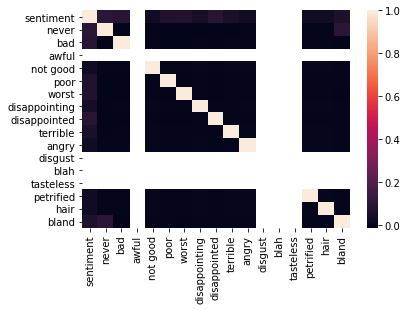

In [104]:
sns.heatmap(yelp_raw.corr())

In [105]:
data = yelp_raw[keywords]
target = yelp_raw['sentiment']

In [106]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 445


In [107]:
from sklearn.metrics import confusion_matrix
print('confusion matrix:' ,confusion_matrix(target, y_pred))

Accuracy = ((target == y_pred).sum())/ data.shape[0] * 100
print("Accuracy %: {}".format(Accuracy))

confusion matrix: [[496   4]
 [441  59]]
Accuracy %: 55.50000000000001


In [108]:
#check for overfitting

#Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.55
Testing on Sample: 0.555


In [109]:
#cross validation 
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.53, 0.59, 0.55, 0.53, 0.54, 0.54, 0.56, 0.53, 0.54])


Looks like we have a 55.5% accuray with 441 False negatives or missed negative classifications, which means we're pretty bad at predicting our negative reviews. We're pretty good at getting the positive ones right, only 4 were positive key reviews that we missed.  It also looks like our model is overfitting, considering the fluctuating scores we got from the cross validation and holdout groups. 

### Model Version #2 : Testing with positive verbiage

In [110]:
keywords2 = ['loved', 'great','good', 'best', 'tasty', 'wow', 'selection', 'recomend', 'recommended', 'amazing','fantastic', 'above', 'glad', 'prompt'] 
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    ) 

In [111]:
yelp_raw['sentiment'] = (yelp_raw['sentiment'] == 1)

In [112]:
data = yelp_raw[keywords2]
target = yelp_raw['sentiment']
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 403


In [113]:
from sklearn.metrics import confusion_matrix
print('confusion matrix:' ,confusion_matrix(target, y_pred))

Accuracy = ((target == y_pred).sum())/ data.shape[0] * 100
print("Accuracy %: {}".format(Accuracy))


confusion matrix: [[115 385]
 [ 18 482]]
Accuracy %: 59.699999999999996


In [114]:
#check for overfitting

#Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.59
Testing on Sample: 0.597


In [115]:
#cross validation 
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.6 , 0.66, 0.6 , 0.58, 0.55, 0.58, 0.6 , 0.6 , 0.55, 0.61])

Looks like we have a 59.69% accuray, so better than the negative keyword model! Here we have only 18 False negatives that we missed, so we're not too bad at predicting positive reviews out of the 500 total positive reviews. We're still not that good at getting the negative ones right,  looks like we misclassified 385 negative reviews as positive reviews. However, our model doesn't appear to be really overfitting in this case, considering there's lesser fluctuations in the cross validation and holdout groups. 

### Model Version #3 : increasing negative keyword count 

In [116]:
#input top 1000 negative keywords 
keywords2 = ['Crust', 'Not', 'texture', 'nasty.', 'Now', 'am', 'getting', 'angry', 'damn', 'pho.', 'Honeslty', "didn't", 'taste', 'THAT', 'fresh', 'potatoes', 'rubber', 'tell', 'ahead', 'being', 'under', 'warmer.', 'Would', 'back.', 'cashier', 'no', 'ended', 'being', 'wayyy', 'overpriced.', 'disgusted', 'because', 'sure', 'human', 'hair.', 'shocked', 'because', 'no', 'signs', 'indicate', 'cash', 'only.', 'Waitress', 'little', 'slow', 'time,', 'let', 'alone', 'all.', 'Burrittos', 'Blah!', 'brought', 'asked', 'for.', 'Took', 'an', 'hour', '4', 'tables', 'Luke', 'warm,', 'sever', 'around', 'totally', 'overwhelmed.', 'salmon', 'sashimi.', 'final', 'blow!', 'seems', 'quick', 'grab', 'bite', 'familiar', 'pub', 'do', 'yourself', 'favor', 'look', 'elsewhere.', 'Poor', 'waiter', 'me', 'stupid', 'sucks.', 'There', 'enough', 'would', 'drag', 'me', 'into', 'establishment', 'Hard', 'judge', 'whether', 'these', 'sides', 'because', 'grossed', 'melted', 'styrofoam', "didn't", 'fear', 'getting', 'sick.', 'Frozen', 'pucks', 'disgust,', 'people', 'behind', 'register.', 'too', 'bad', 'damn', 'generic.', 'horrible', 'attitudes', 'towards', 'customers,', 'talk', 'each', 'customers', "don't", 'enjoy', 'Heart', 'Attack', 'Grill', 'downtown', 'an', 'absolutely', 'flat-lined', 'excuse', 'restaurant.', 'Not', 'much', 'seafood', 'strings', 'bottom.', 'ripped', 'banana', 'ripped,', 'petrified', 'tasteless.', 'At', 'least', 'think', 'refill', 'water', 'before', 'struggle', 'wave', '10', 'minutes.', 'apparently', 'heard', 'salt', 'batter', 'fish', 'chewy.', 'meh.', 'It', 'took', '30', 'min', 'milkshake,', 'nothing', 'more', 'chocolate', 'milk.', 'guess', 'should', 'known', 'would', 'suck,', 'because', 'Excalibur,', "didn't", 'use', 'common', 'sense.', 'scallop', 'dish', 'quite', 'appalling', 'value', 'times', 'Very', 'Bad', 'Customer', '!', 'There', 'much', 'cheated', 'wasting', 'an', 'eating', 'opportunity', 'Rice', 'Company.', 'Coming', 'experiencing', 'an', 'underwhelming', 'relationship', 'both', 'parties', "can't", 'wait', 'ask', 'break', 'up.', 'walked', 'smelled', 'an', 'old', 'grease', 'trap', 'others', 'eating.', 'turkey', 'roast', 'beef', 'bland.', 'pan', 'cakes', 'everyone', 'raving', 'about', 'taste', 'sugary', 'disaster', 'tailored', 'palate', 'six', 'year', 'old.', 'poor', 'batter', 'meat', 'ratio', 'tenders', 'unsatisfying.', 'In', 'summary,', 'largely', 'disappointing', 'experience.', 'Never', 'Hard', 'Rock', 'Casino', 'before,', 'WILL', 'NEVER', 'EVER', 'STEP', 'FORWARD', 'IN', 'IT', 'AGAIN!', 'bye', 'bye', 'tip', 'lady!', "We'll", 'It', 'REAL', 'sushi', 'lovers,', "let's", 'honest', 'Yama', 'At', 'least', '40min', 'passed', 'between', 'ordering', 'arriving,', "wasn't", 'busy.', 'It', 'gross!', 'atmosphere.', 'Kind', 'hard', 'mess', 'did.', 'Although', 'much', 'liked', 'look', 'sound', 'place,', 'actual', 'experience', 'bit', 'disappointing.', "don't", 'know', 'managed', 'served', 'blandest', 'eaten', 'preparing', 'Indian', 'cuisine.', 'Worst', 'boot,', 'least', 'worries.', 'Host', 'were,', 'lack', 'word,', 'BITCHES!', 'Bland...', 'Not', 'liking', 'number', 'reasons', "don't", 'waste', 'bad', 'reviewing..', "I'll", 'leave', 'that...', "wouldn't", 'return.', 'too', 'overpriced', 'mediocre', 'management', 'rude.', 'extremely', 'rude', 'really,', 'many', 'restaurants', 'would', 'dine', 'weekend', "Don't", 'do', 'it!!!!', 'waiter', "wasn't", 'or', 'rarely', 'checked', 'us.', 'ate', 'disappointed', 'And', 'curry', 'much', 'bamboo', 'shoots', "wasn't", 'me.', 'changing,', '&', 'extremely', 'slow.', 'little', 'slow', ',', 'considering', 'served', '3', 'people', 'servers', 'coming', 'slow', 'pace.', 'thumbs', 'watched', 'waiter', 'pay', 'lot', 'more', 'attention', 'tables', 'ignore', 'us.', 'waited', 'forty', 'five', 'minutes', 'vain.', 'Crostini', 'stale.', 'Unfortunately,', 'must', 'bakery', 'leftover', 'because', 'everything', 'STALE.', 'today', 'relocated', 'impressed.', 'Avoid', 'cost!', "don't", 'if', 'looking', 'food...', 'treated', 'bad.', 'spinach', 'avocado', 'salad;', 'ingredients', 'sad', 'literally', 'zero', 'taste.', 'Perhaps', 'caught', 'them', 'an', 'night', 'judging', 'reviews,', 'inspired', 'back.', 'leaves', 'lot', 'desired.', 'literally', 'sat', '20', 'minutes', 'no', 'asking', 'take', 'order.', 'absolutely', 'no', 'flavor', 'meat', 'totally', 'bland,']
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )  

In [117]:
yelp_raw['sentiment'] = (yelp_raw['sentiment'] == 1)

In [118]:
data = yelp_raw[keywords2]
target = yelp_raw['sentiment']
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 283


In [119]:
from sklearn.metrics import confusion_matrix
print('confusion matrix:' ,confusion_matrix(target, y_pred))

Accuracy = ((target == y_pred).sum())/ data.shape[0] * 100
print("Accuracy %: {}".format(Accuracy))


confusion matrix: [[456  44]
 [239 261]]
Accuracy %: 71.7


In [120]:
#check for overfitting

#Test your model with different holdout groups.

from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.655
Testing on Sample: 0.717


In [121]:
#cross validation 
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.78, 0.73, 0.71, 0.61, 0.6 , 0.64, 0.7 , 0.65, 0.62, 0.73])

Our accuray level here is the highest it's been at 71.7% since we've added more keywords. We have 239 false negative reviews we missed, so we're pretty bad at classifying the negative reviews, a little less than 50% were missed. We're pretty good at getting the positive ones right still, considering we classified only 44 positive reviews as negative (FP) out of the 500. Our model again is slightly overfitting considering our fluctuating holdout groups and cross validation scores. 

### Model Version #4 : increasing positive keyword count 

In [122]:
#input top 1000 positive keywords 
keywords2 = ['Wow...', 'Loved', 'place.', 'Stopped', 'late', 'May', 'bank', 'holiday', 'Rick', 'Steve', 'recommendation', 'loved', 'it.', 'selection', 'great', 'prices.', 'fries', 'great', 'too.', 'A', 'great', 'touch.', 'prompt.', 'tried', 'Cape', 'Cod', 'ravoli,', 'chicken,with', 'cranberry...mmmm!', 'Highly', 'recommended.', 'amazing.', 'cute.', 'less...', 'interior', 'beautiful.', 'performed.', "That's", 'right....the', 'velvet', 'cake.....ohhh', 'stuff', 'hole', 'wall', 'has', 'great', 'Mexican', 'street', 'tacos,', 'staff.', 'Also', 'combos', 'burger,', 'fries,', 'beer', '23', 'decent', 'deal.', 'found', 'accident', 'happier.', 'Overall,', 'lot.', 'redeeming', 'inexpensive.', 'Ample', 'portions', 'prices.', 'first', 'visit', 'Hiro', 'delight!', 'shrimp', 'tender', 'moist.', 'On', 'positive', 'note,', 'server', 'attentive', 'provided', 'great', 'thing', 'prime', 'rib', 'dessert', 'section.', 'beef,', 'cooked', 'right.', 'If', 'sandwich', 'any', 'Firehouse!!!!!', 'side', 'Greek', 'Greek', 'tasty,', 'pita', 'hummus', 'refreshing.', 'duck', 'rare', 'pink', 'tender', 'nice', 'char', 'outside.', 'after', 'realized', 'left', 'his', 'sunglasses', 'Their', 'chow', 'mein', 'good!', 'portion', 'huge!', 'Loved', 'it...friendly', 'servers,', 'great', 'wonderful', 'imaginative', 'menu.', 'right', 'amount', 'sauce', 'power', 'scallop,', 'perfectly', 'cooked.', 'receives', 'stars', 'APPETIZERS!!!', 'cocktails', 'handmade', 'delicious.', "We'd", 'definitely', 'glad', 'found', 'place.', 'Great', 'huge', 'portions', 'military', 'discount.', 'Always', 'great', 'Dos', 'Gringos!', 'Update.....went', 'second', 'amazing', 'A', 'great', 'finish', 'great.', 'included', 'tastings', 'drinks,', 'Jeff', 'went', 'above', 'beyond', 'expected.', 'Really,', 'really', 'rice,', 'time.', 'sweet', 'potato', 'fries', 'seasoned', 'Today', 'second', 'buffet', 'has', 'it!', 'Pho', 'spring', 'rolls', 'oh', 'yummy', 'try.', 'All', 'amazing!!!', 'Omelets', 'die', 'for!', 'Everything', 'fresh', 'delicious!', 'really', 'sexy', 'party', 'mouth,', "you're", 'outrageously', 'flirting', 'hottest', 'party.', 'Best', 'breakfast', 'buffet!!!', 'Will', 'again!', 'Food', 'arrived', 'quickly!', 'On', 'side,', 'cafe', 'serves', 'really', 'server', 'fantastic', 'found', 'wife', 'loves', 'roasted', 'garlic', 'bone', 'marrow,', 'added', 'extra', 'meal', 'another', 'marrow', 'go!', 'thing', 'waiter,', 'bloddy', "mary's", 'coming.', 'Best', 'Buffet', 'town,', 'price', 'cannot', 'beat', 'it.', 'LOVED', 'mussels', 'cooked', 'wine', 'reduction,', 'duck', 'tender,', 'potato', 'dishes', 'delicious.', 'buffets', 'to.', 'went', 'Tigerlilly', 'fantastic', 'afternoon!', 'delicious,', 'bartender', 'attentive', 'personable', 'AND', 'great', 'deal!', 'ambience', 'wonderful', 'music', 'playing.', 'Will', 'next', 'trip', 'out.', 'Sooooo', 'good!!', 'really', 'fantastic', 'Thai', 'definitely', 'visit.', 'Nice,', 'spicy', 'tender.', 'Good', 'prices.', 'Check', 'out.', 'fine', 'waitress', 'friendly.', 'guys', 'steaks,', 'loving', 'son', 'who', 'has', 'best', 'places', 'said', 'best', "he's", 'eaten.', 'thought', "you'd", 'venture', 'further', 'away', 'sushi,', 'really', 'spot', 'night.', 'Phenomenal', 'ambiance.', 'Definitely', 'venturing', 'strip', 'pork', 'belly,', 'will', 'return', 'next', 'Penne', 'vodka', 'excellent!', 'selection', 'including', 'massive', 'meatloaf', 'sandwich,', 'crispy', 'wrap,', 'delish', 'tuna', 'melt', 'burgers.', 'Delicious', 'NYC', 'bagels,', 'selections', 'cream', 'cheese,', 'real', 'Lox', 'capers', 'even.', 'Great', 'Subway,', 'fact', "it's", 'come', 'Subway', 'will', 'meet', 'expectations.', 'seriously', 'solid', 'breakfast', 'here.', 'best', 'bars', 'drink', 'empty', 'really', 'great', 'suggestions.', 'Nice', 'blanket', 'moz', 'top', 'i', 'done', 'cover', 'subpar', 'bathrooms', 'clean', 'well', 'decorated.', 'fiancé', 'middle', 'greeted', 'seated', 'right', 'away.', 'great', 'Mandalay', 'Bay.', 'Some', 'highlights', ':', 'Great', 'nigiri', 'here!', 'joint', 'clean.', 'different', 'cut', 'piece', 'wonderful', 'tender', 's', 'well', 'well', 'flavored.', 'Voodoo', 'first', "I'd", 'really', 'excellent', 'gluten', 'free', 'several', 'years', 'ago.', 'seated', 'immediately.', 'Their', 'diverse,', 'reasonably', 'priced.', 'Restaurant', 'full', 'wait.', 'DELICIOUS!!', 'hands-down', 'best', 'places', 'Phoenix', 'metro', 'area.', 'Bacon', 'hella', 'salty.', 'really', 'fine', 'used', 'be,', 'right', 'menus', 'handed']
for key in keywords2:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    yelp_raw[str(key)] = yelp_raw.review.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )  

In [123]:
yelp_raw['sentiment'] = (yelp_raw['sentiment'] == 1)

In [124]:
data = yelp_raw[keywords2]
target = yelp_raw['sentiment']
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 355


In [125]:
from sklearn.metrics import confusion_matrix
print('confusion matrix:' ,confusion_matrix(target, y_pred))

Accuracy = ((target == y_pred).sum())/ data.shape[0] * 100
print("Accuracy %: {}".format(Accuracy))

confusion matrix: [[159 341]
 [ 14 486]]
Accuracy %: 64.5


Our accuray level here is at 64.5% since we've added more keywords to the positive model. We have 14 False negative reviews we missed, so we're not too bad at predicting the positive reviews now of the 500 total. Now we're worse at getting the negative ones right, considering we classified 341 negative reviews as positive (FP). Our model again is slightly overfitting considering our fluctuating holdout groups and cross validation scores.

### Conclusion 

The highest accuracy predicition level was at 71.7% when we input the top 1K negative keywords into the model, however this model was slightly overfitting. The best fit model, was our first model with just a few negative keywords. I'd still recommend going with the thrid model, even though the model is overfitting its lowest accuracy percentage was still higher than that of the original model. 